# Análise Exploratória - Projeto 3
## Beatriz Mie e Vitória de Almeida

1) Importanto as bibliotecas:

In [2]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2) Lendo o dataset de treinamento:

In [5]:
data = pd.read_csv('featuresdf.csv')

3) Análise das variáveis:

In [6]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


4) Gráfico de dispersão, correlacionando as variáveis:

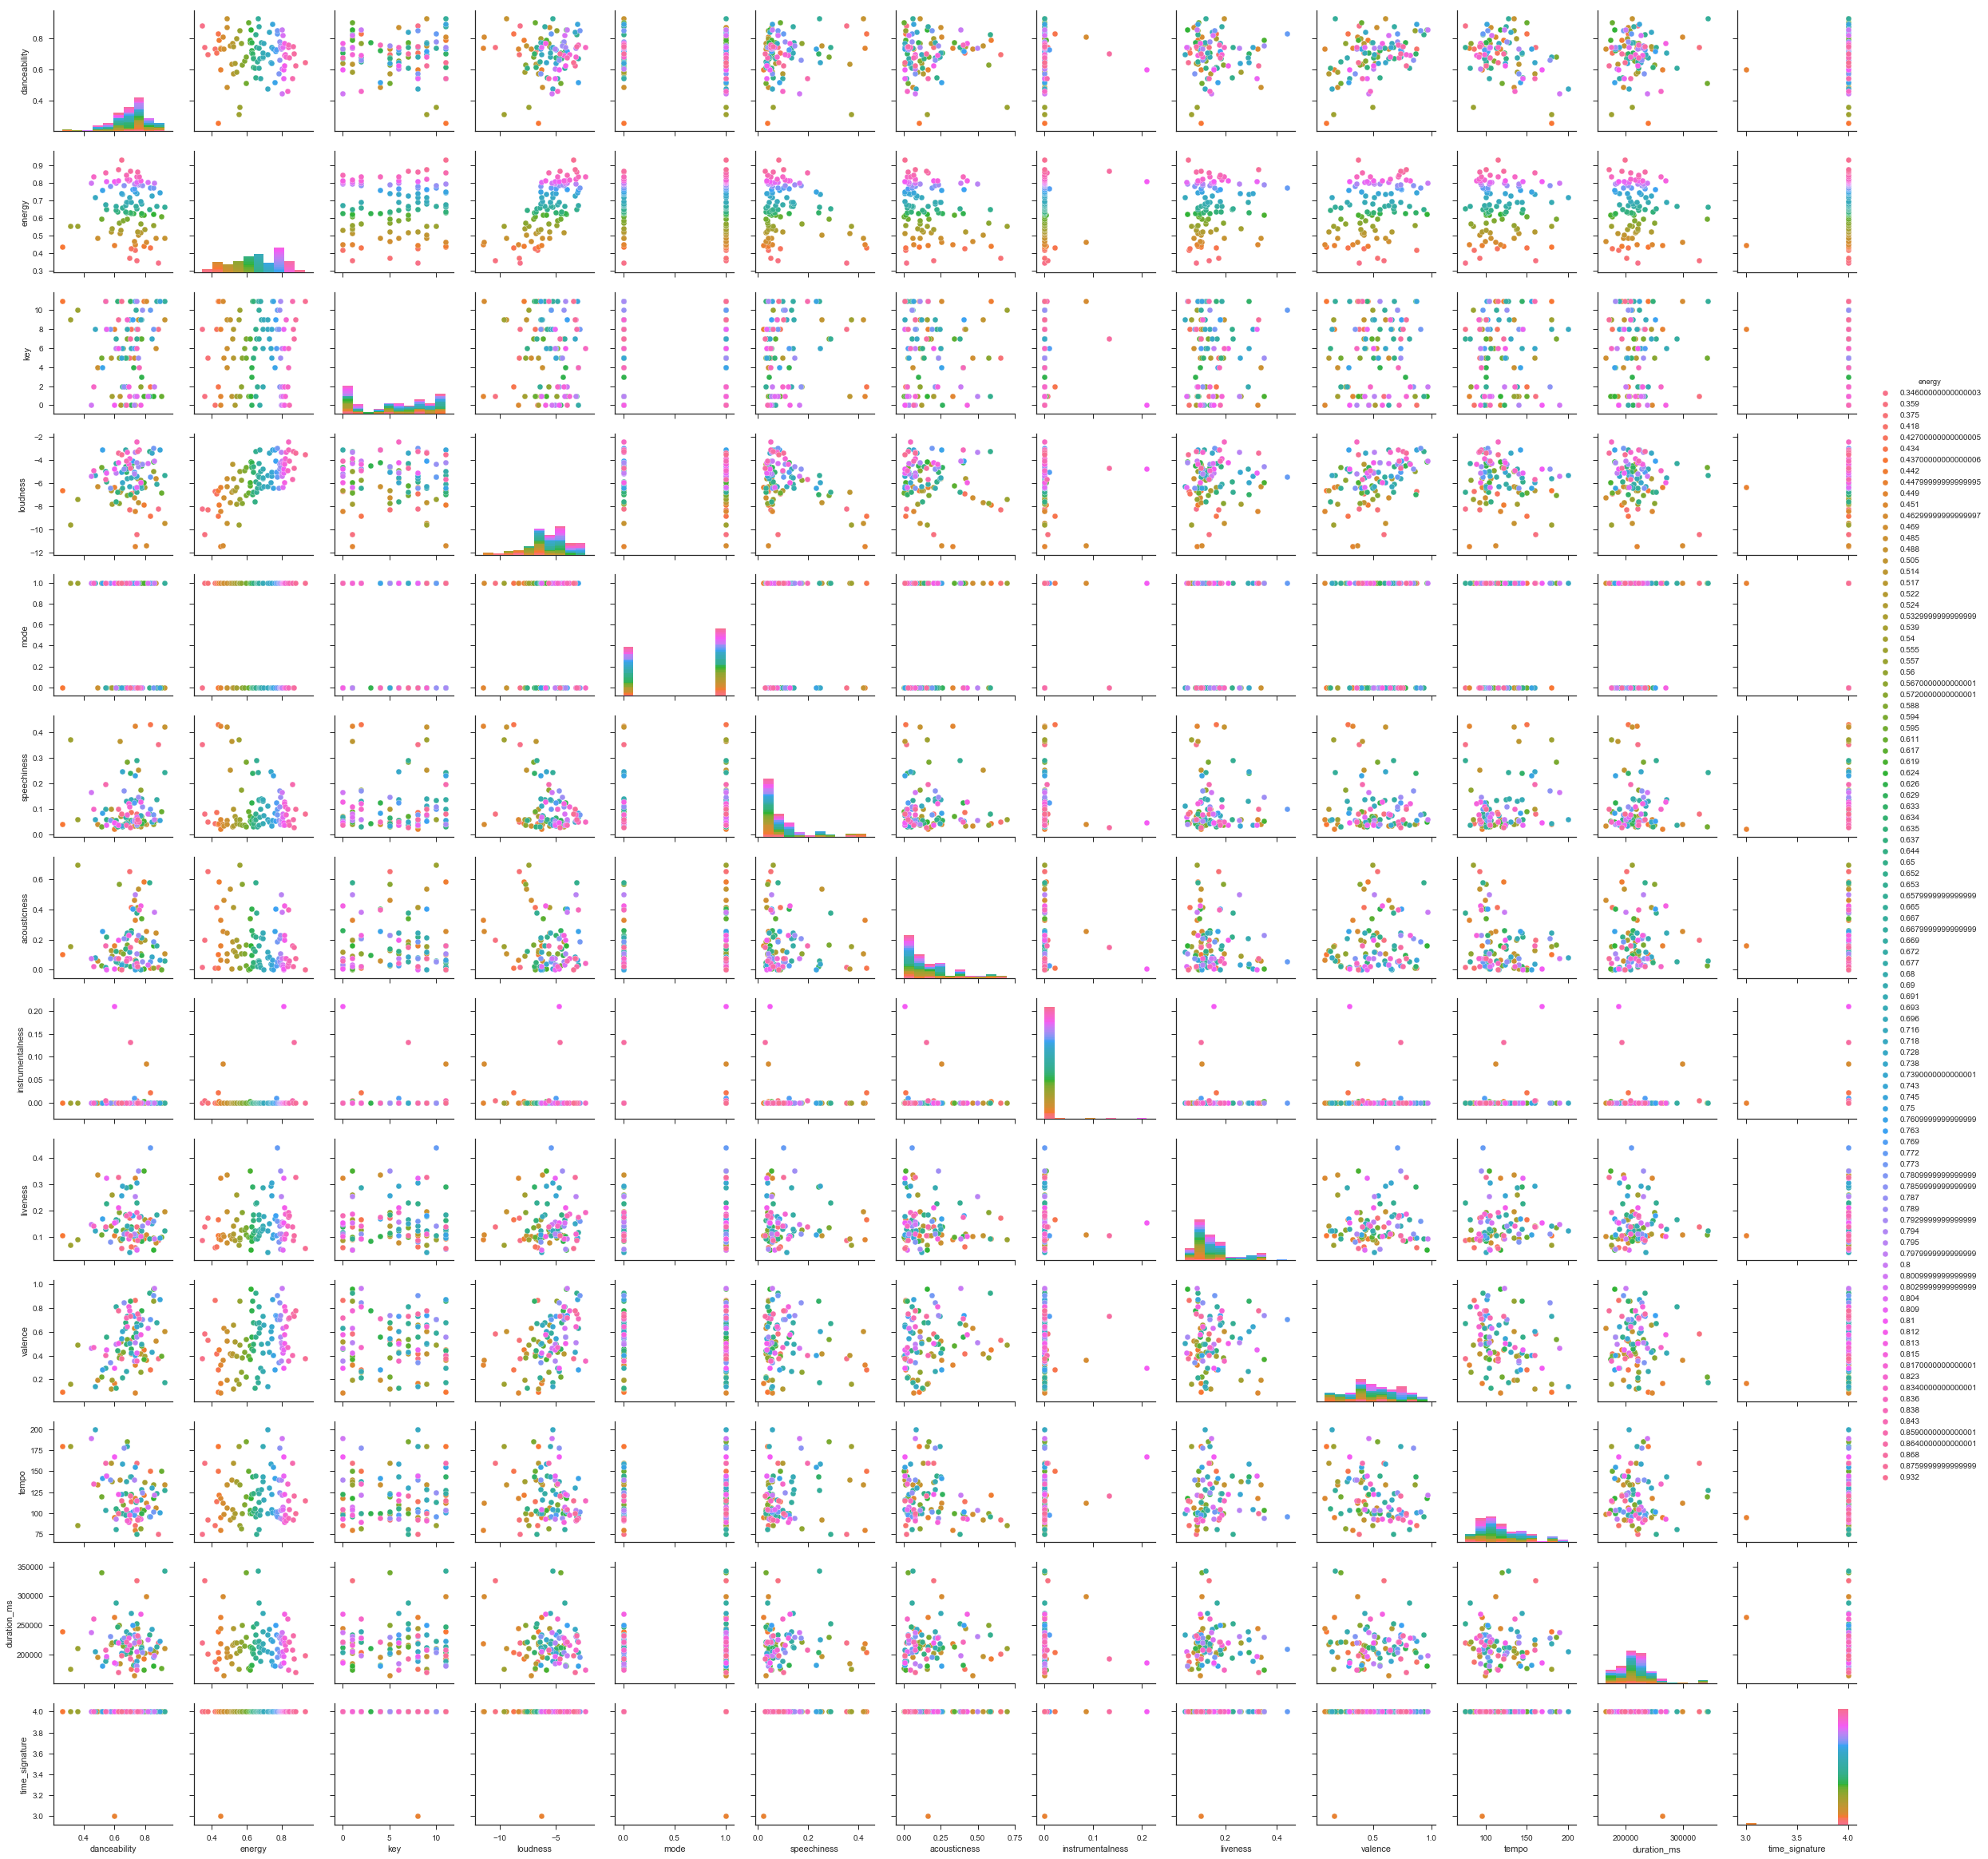

In [7]:
sns.set(style = 'ticks')
sns.pairplot(data, hue = 'energy')

5) Após a análise, exluímos do dataset algumas variáveis julgamos nao ser importantes para a regressão:

In [9]:
data = data.drop('mode', axis = 1)
data = data.drop('duration_ms', axis = 1)
data = data.drop('time_signature', axis = 1)

6) Fizemos a correlação:

In [10]:
data.corr()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.057239,-0.068057,0.052759,0.111775,0.039398,-0.019826,-0.042014,0.423435,-0.364492
energy,-0.057239,1.000000,0.049560,0.709141,-0.206672,-0.253051,0.101128,0.147744,0.321781,0.032676
key,-0.068057,0.049560,1.000000,-0.053684,0.070721,0.021402,-0.062148,-0.012909,-0.023195,0.005246
loudness,0.052759,0.709141,-0.053684,1.000000,-0.443359,-0.153320,-0.057377,0.060033,0.407731,-0.136692
speechiness,0.111775,-0.206672,0.070721,-0.443359,1.000000,-0.061942,-0.081229,-0.019815,-0.111576,0.172082
acousticness,0.039398,-0.253051,0.021402,-0.153320,-0.061942,1.000000,-0.074258,-0.135417,0.127241,-0.253404
instrumentalness,-0.019826,0.101128,-0.062148,-0.057377,-0.081229,-0.074258,1.000000,-0.040742,-0.061523,0.148184
liveness,-0.042014,0.147744,-0.012909,0.060033,-0.019815,-0.135417,-0.040742,1.000000,-0.000645,0.049356
valence,0.423435,0.321781,-0.023195,0.407731,-0.111576,0.127241,-0.061523,-0.000645,1.000000,-0.291877
tempo,-0.364492,0.032676,0.005246,-0.136692,0.172082,-0.253404,0.148184,0.049356,-0.291877,1.000000


7) Salvamos um novo arquivo csv:

In [13]:
data.to_csv('featuresdf.csv')